In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/yogeshsaini/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
# read th desata set
df=pd.read_csv('/home/yogeshsaini/Machine Learning/Linear Regression Practical/height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

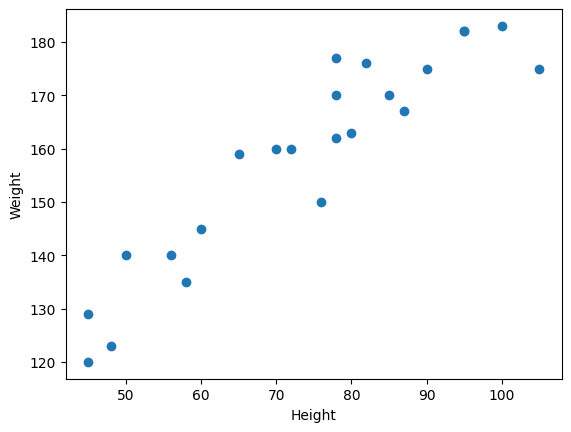

In [10]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('Height')
plt.ylabel('Weight')

In [15]:
# divide our data set into independent and  dependent features
X = df['Weight'] # independent feature
y = df['Height'] # dependent feature

In [16]:
X


0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [17]:
# train test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
X.shape

(23,)

In [19]:
X_train.shape

(18,)

In [ ]:
# standarize the data Train for independent feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
